**ANOVA,** or Analysis of Variance, is a statistical test used to compare means across two or more groups. It is used to determine if there are any statistically significant differences between the means of the groups being compared. The test calculates the F-ratio, which is the ratio of the variance between groups to the variance within groups.

In order to perform an ANOVA test, we need to have a dependent variable and one or more independent variables. The dependent variable is the variable that we are interested in comparing between groups, while the independent variables are the variables that define the groups.

The ANOVA test has two hypotheses: the null hypothesis and the alternative hypothesis. The null hypothesis is that there is no significant difference between the means of the groups being compared. The alternative hypothesis is that there is a significant difference between the means of the groups being compared.

**Example**:
Suppose we want to compare the effectiveness of three different types of fertilizer on plant growth. We randomly divide a plot of land into three equal parts and apply a different type of fertilizer to each section. After a month, we measure the height of the plants in each section. Our null hypothesis is that there is no difference in plant growth between the three fertilizers. Our alternative hypothesis is that there is a significant difference in plant growth between the fertilizers.

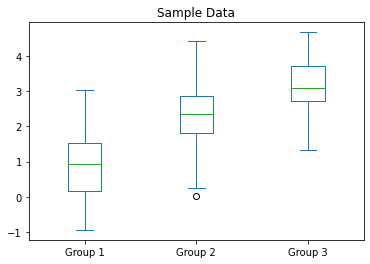

ANOVA test results:
F-value = 95.07051563449924
p-value = 3.189118821872013e-27
Reject null hypothesis: There is a significant difference between the group means.


In [4]:
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt

class AnovaTest:
    
    def __init__(self, groups):
        self.groups = groups
        self.fvalue = None
        self.pvalue = None
        self.result = None
        
    def generate_data(self, n_samples, group_means, group_sd):
        data = {}
        for i, group_name in enumerate(self.groups):
            data[group_name] = stats.norm(group_means[i], group_sd).rvs(n_samples)
        self.df = pd.DataFrame(data)
    
    def visualize_data(self, title):
        self.df.plot.box(title=title)
        plt.show()
    
    def perform_test(self):
        fvalue, pvalue = stats.f_oneway(*[self.df[group] for group in self.groups])
        self.fvalue = fvalue
        self.pvalue = pvalue
        if pvalue < 0.05:
            self.result = 'Reject null hypothesis: There is a significant difference between the group means.'
        else:
            self.result = 'Fail to reject null hypothesis: There is no significant difference between the group means.'
    
    def __repr__(self):
        return f'ANOVA test results:\nF-value = {self.fvalue}\np-value = {self.pvalue}\n{self.result}'

# Example usage
groups = ['Group 1', 'Group 2', 'Group 3']
n_samples = 50
group_means = [1, 2, 3]
group_sd = 1

test = AnovaTest(groups)
test.generate_data(n_samples, group_means, group_sd)
test.visualize_data('Sample Data')
test.perform_test()
print(test)